## Install package and get dataset

install package kaggle untuk download dataset

In [ ]:
!pip install -q kaggle

fungsi files untuk upload key kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"paullestyo","key":"4478a528483cd98297247fa2aa60b9c8"}'}

memindahkan kaggle.json agar dikenali platform

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

download dataset snehal1409/movielens dari kaggle kemudian di unzip

In [ ]:
! kaggle datasets download -d snehal1409/movielens/
! mkdir data
! unzip movielens -d data

  0% 0.00/910k [00:00<?, ?B/s]
100% 910k/910k [00:00<00:00, 154MB/s]
Archive:  movielens.zip
  inflating: data/README.txt         
  inflating: data/links.csv          
  inflating: data/movies.csv         
  inflating: data/ratings.csv        
  inflating: data/tags.csv           


import kebutuhan library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Data Understanding

membaca dataset ratings

In [ ]:
rating = pd.read_csv("data/ratings.csv")
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


preview dataset rating

In [ ]:
rating.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


mengidentifikasi user yang melakukan rating dan banyak movie yang di rating

In [ ]:
print("Banyak user yang melakukan rating:", rating.userId.nunique())
print("Banyak movie yang di rating:", rating.movieId.nunique())

Banyak user yang melakukan rating: 671
Banyak movie yang di rating: 9066


memvisualkan sebaran data rating dari user

<Axes: xlabel='rating', ylabel='count'>

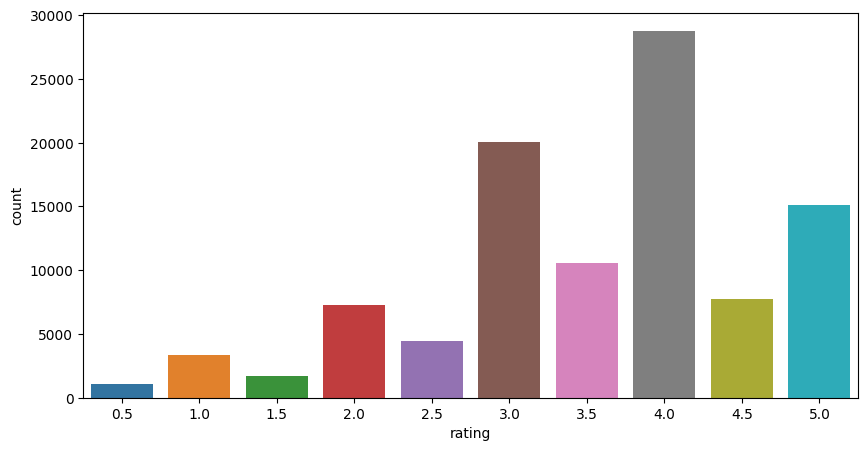

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x=rating.rating)

melihat dataset movies

In [ ]:
movies = pd.read_csv("data/movies.csv")
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9125 non-null   int64 
 1   title    9125 non-null   object
 2   genres   9125 non-null   object
dtypes: int64(1), object(2)
memory usage: 214.0+ KB


preview dataset movies

In [ ]:
movies.head()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


mengidentifikasi total movies dan movie yang tidak di rating

In [ ]:
print("Total judul movie:", movies.movieId.nunique())
print("Movie yang tidak di rating:", (movies.movieId.nunique() - rating.movieId.nunique()))

Total judul movie: 9125
Movie yang tidak di rating: 59


# Content-Based Filtering

## Data Preparation

memisahkan genres menjadi array

In [ ]:
movies["genres"] = movies["genres"].str.split("|")
movies

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]
...,...,...,...
9120,162672,Mohenjo Daro (2016),"[Adventure, Drama, Romance]"
9121,163056,Shin Godzilla (2016),"[Action, Adventure, Fantasy, Sci-Fi]"
9122,163949,The Beatles: Eight Days a Week - The Touring Y...,[Documentary]
9123,164977,The Gay Desperado (1936),[Comedy]


import TfidfVectorizer untuk representasi numerik

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

menghitung bobot TF-IDF dari kolom genres

In [ ]:
tf = TfidfVectorizer()
tf.fit(movies['genres'].apply(lambda x: ' '.join(x)))
tf.get_feature_names_out()

array(['action', 'adventure', 'animation', 'children', 'comedy', 'crime',
       'documentary', 'drama', 'fantasy', 'fi', 'film', 'genres',
       'horror', 'imax', 'listed', 'musical', 'mystery', 'no', 'noir',
       'romance', 'sci', 'thriller', 'war', 'western'], dtype=object)

melihat shape matrix tfidf

In [ ]:
tfidf_matrix = tf.fit_transform(movies['genres'].apply(lambda x: ' '.join(x)))
tfidf_matrix.shape

(9125, 24)

preview matrix tfidf

In [ ]:
tfidf_matrix.todense()

matrix([[0.        , 0.41043288, 0.5315272 , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.510466  , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

preview sampel matrix tfidf berdasarkan genres

In [ ]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=movies.movieId
).sample(22, axis=1).sample(10, axis=0)

,mystery,sci,listed,adventure,imax,horror,western,film,noir,fi,...,crime,action,comedy,genres,children,fantasy,war,documentary,no,musical
movieId,,,,,,,,,,,,,,,,,,,,,
7095,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2888,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.586999,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7272,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.689248,0.614136,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99741,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2939,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3028,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1417,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7484,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0
96821,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


menghitung cosine_similarity dari matrix tfidf

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.80403568, 0.15641664, ..., 0.        , 0.26646851,
        0.        ],
       [0.80403568, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.15641664, 0.        , 1.        , ..., 0.        , 0.58699859,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.26646851, 0.        , 0.58699859, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        1.        ]])

preview sampel similarity movie satu dengan movie lainnya

In [ ]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=movies['movieId'], columns=movies['movieId'])
print('Shape:', cosine_sim_df.shape)

cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (9125, 9125)


movieId,56949,140743,88024,8725,89030
movieId,,,,,
3839,0.000000,0.000000,0.000000,0.000000,0.856629
55684,0.000000,0.384415,0.384415,0.173766,0.000000
26649,0.000000,0.283638,0.283638,0.128212,0.000000
131724,0.000000,0.000000,0.000000,0.000000,0.000000
7165,0.000000,0.386945,0.386945,0.174910,0.000000
1057,0.637792,0.000000,0.000000,0.568912,0.193156
106542,0.777220,0.000000,0.000000,0.693283,0.235383
27869,0.000000,0.325696,0.325696,0.147224,0.000000
1059,0.686238,0.530574,0.530574,0.851961,0.000000


melihat bahwa movieId 8267 dan 3790 relevan (genre yang mirip)

In [ ]:
filtered_movies = movies[(movies['movieId'] == 8267) | (movies['movieId'] == 3790)]
print(filtered_movies)

      movieId                                 title   genres
3030     3790                         Groove (2000)  [Drama]
5379     8267  Signs of Life (Lebenszeichen) (1968)  [Drama]


fungsi menampilkan movie rekomendasi sebanyak 5

In [ ]:
def movie_recommendations(movieId, similarity_data=cosine_sim_df, items=movies[['movieId', 'title', 'genres']], k=5):

    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,movieId].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop nama_resto agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(movieId, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

mencari rekomendasi film yang relevan dengan movieId 1

In [ ]:
movie_recommendations(1)

,movieId,title,genres
0,91355,Asterix and the Vikings (Astérix et les Viking...,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,4016,"Emperor's New Groove, The (2000)","[Adventure, Animation, Children, Comedy, Fantasy]"
2,4886,"Monsters, Inc. (2001)","[Adventure, Animation, Children, Comedy, Fantasy]"
3,3114,Toy Story 2 (1999),"[Adventure, Animation, Children, Comedy, Fantasy]"
4,3754,"Adventures of Rocky and Bullwinkle, The (2000)","[Adventure, Animation, Children, Comedy, Fantasy]"


# Collaborative Filtering

import library yang dibutuhkan

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

preview dataset rating

In [ ]:
df = rating
df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


merge rating dengan title movie

In [ ]:
df = pd.merge(df,movies[['movieId', 'title']],on='movieId')
df.head()

,userId,movieId,rating,timestamp,title
0,1,31,2.5,1260759144,Dangerous Minds (1995)
1,7,31,3.0,851868750,Dangerous Minds (1995)
2,31,31,4.0,1273541953,Dangerous Minds (1995)
3,32,31,4.0,834828440,Dangerous Minds (1995)
4,36,31,3.0,847057202,Dangerous Minds (1995)


encoded / pemetaan nilai userId

In [ ]:
user_ids = df['userId'].unique().tolist()
print('list userId: ', user_ids)

user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)

user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list userId:  [1, 7, 31, 32, 36, 39, 73, 88, 96, 110, 111, 150, 161, 165, 186, 242, 254, 288, 310, 311, 325, 338, 341, 386, 394, 452, 457, 461, 468, 485, 487, 496, 511, 516, 525, 590, 596, 601, 607, 619, 639, 641, 19, 35, 61, 99, 102, 128, 175, 185, 188, 213, 214, 268, 294, 303, 363, 387, 420, 442, 466, 471, 472, 514, 518, 529, 530, 547, 551, 564, 575, 577, 582, 602, 603, 605, 646, 665, 23, 30, 70, 90, 105, 119, 141, 212, 233, 252, 292, 306, 318, 380, 507, 509, 534, 537, 584, 608, 647, 21, 34, 41, 49, 57, 66, 77, 103, 118, 155, 177, 195, 248, 276, 299, 346, 351, 353, 358, 390, 423, 463, 522, 580, 585, 597, 624, 634, 654, 38, 56, 94, 130, 133, 148, 198, 229, 232, 262, 280, 283, 320, 321, 330, 372, 373, 391, 430, 441, 460, 481, 497, 505, 510, 521, 539, 545, 587, 15, 17, 22, 152, 257, 265, 309, 344, 370, 434, 527, 533, 592, 648, 661, 137, 207, 313, 326, 335, 388, 404, 405, 470, 488, 559, 598, 20, 48, 78, 211, 236, 281, 419, 532, 576, 81, 95, 243, 247, 285, 290, 297, 300, 308, 312, 337, 36

encoded / pemetaan nilai movieId

In [ ]:
movie_ids = df['movieId'].unique().tolist()

movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}

movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}

penggabungan nilai pemetaan user dan movie menjadi 1 bagian

In [ ]:
df['user'] = df['userId'].map(user_to_user_encoded)
df['movie'] = df['movieId'].map(movie_to_movie_encoded)

melihat banyak user, banyak movie dan min max rating yang diberikan user

In [ ]:
num_users = len(user_to_user_encoded)
print(num_users)

num_movie = len(movie_encoded_to_movie)
print(num_movie)

df['rating'] = df['rating'].values.astype(np.float32)

min_rating = min(df['rating'])
max_rating = max(df['rating'])

print('Number of User: {}, Number of movie: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_movie, min_rating, max_rating
))

671
9066
Number of User: 671, Number of movie: 9066, Min Rating: 0.5, Max Rating: 5.0


menampilkan sampel dataframe setelah dipetakan nilai user dan movie

In [ ]:
df = df.sample(frac=1, random_state=42)
df

,userId,movieId,rating,timestamp,title,user,movie
19090,655,1291,5.0,1470071173,Indiana Jones and the Last Crusade (1989),471,202
99678,624,91873,1.5,1371302167,Joyful Noise (2012),125,8745
18455,56,1270,4.0,1473792749,Back to the Future (1985),129,197
35755,577,4896,4.5,1111475690,Harry Potter and the Sorcerer's Stone (a.k.a. ...,71,478
66536,157,85414,3.5,1320684703,Source Code (2011),280,1668
...,...,...,...,...,...,...,...
6265,285,480,3.0,965088579,Jurassic Park (1993),197,72
54886,95,3535,3.0,1019023102,American Psycho (2000),194,1050
76820,393,432,1.5,1058471886,City Slickers II: The Legend of Curly's Gold (...,548,2529
860,120,3671,2.5,1167422038,Blazing Saddles (1974),214,19


split dataset training dan validation 8:2

In [ ]:
x = df[['user', 'movie']].values

y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

preview split data

In [ ]:
print(x, y)

[[ 471  202]
 [ 125 8745]
 [ 129  197]
 ...
 [ 548 2529]
 [ 214   19]
 [   6  173]] [1.         0.22222222 0.77777778 ... 0.22222222 0.44444444 0.66666667]


pembuatan model rekomendasi collaborative filtering dengan Keras.Model

In [ ]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_movie, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_movie = num_movie
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.movie_embedding = layers.Embedding( # layer embeddings movie
        num_movie,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.movie_bias = layers.Embedding(num_movie, 1) # layer embedding movie bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    movie_vector = self.movie_embedding(inputs[:, 1]) # memanggil layer embedding 3
    movie_bias = self.movie_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)

    x = dot_user_movie + user_bias + movie_bias

    return tf.nn.sigmoid(x) # activation sigmoid

konfigurasi model loss, optimizer dan metrics

In [ ]:
model = RecommenderNet(num_users, num_movie, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

training model dengan epochs 10x

In [ ]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 10,
    validation_data = (x_val, y_val)
)

Epoch 1/10
10001/10001 [==============================] - 62s 6ms/step - loss: 0.5991 - root_mean_squared_error: 0.2035 - val_loss: 0.6012 - val_root_mean_squared_error: 0.2069
Epoch 2/10
10001/10001 [==============================] - 52s 5ms/step - loss: 0.5946 - root_mean_squared_error: 0.1986 - val_loss: 0.5989 - val_root_mean_squared_error: 0.2044
Epoch 3/10
10001/10001 [==============================] - 51s 5ms/step - loss: 0.5914 - root_mean_squared_error: 0.1949 - val_loss: 0.5990 - val_root_mean_squared_error: 0.2045
Epoch 4/10
10001/10001 [==============================] - 53s 5ms/step - loss: 0.5896 - root_mean_squared_error: 0.1927 - val_loss: 0.5979 - val_root_mean_squared_error: 0.2032
Epoch 5/10
10001/10001 [==============================] - 46s 5ms/step - loss: 0.5884 - root_mean_squared_error: 0.1913 - val_loss: 0.5976 - val_root_mean_squared_error: 0.2027
Epoch 6/10
10001/10001 [==============================] - 46s 5ms/step - loss: 0.5875 - root_mean_squared_error: 0.

melakukan visualisasi proses training model

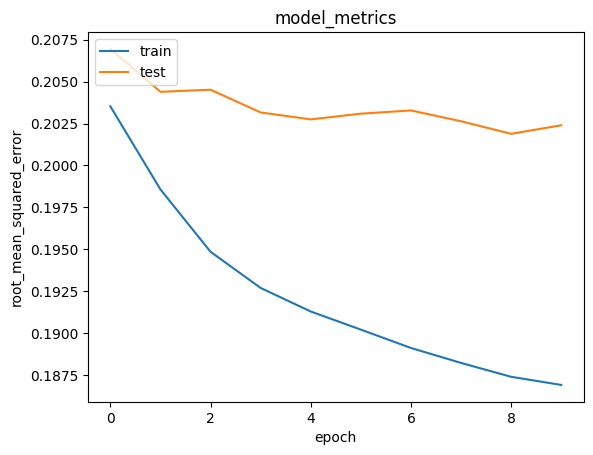

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

membuat sampel user untuk diberikan rekomendasi film

In [ ]:
movie_df = movies
df = pd.read_csv('data/ratings.csv')

# Mengambil sample user
user_id = df.userId.sample(1).iloc[0]
movie_watched_by_user = df[df.userId == user_id]

movie_not_watched = movie_df[~movie_df['movieId'].isin(movie_watched_by_user.movieId.values)]['movieId']
movie_not_watched = list(
    set(movie_not_watched)
    .intersection(set(movie_to_movie_encoded.keys()))
)

movie_not_watched = [[movie_to_movie_encoded.get(x)] for x in movie_not_watched]
user_encoder = user_to_user_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movie_not_watched), movie_not_watched)
)

melakukan pemberian rekomendasi film oleh user berdasarkan pola prediksi dari model

In [ ]:
ratings = model.predict(user_movie_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movie_encoded_to_movie.get(movie_not_watched[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('movie with high ratings from user')
print('----' * 8)

top_movie_user = (
    movie_watched_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .movieId.values
)

movie_df_rows = movie_df[movie_df['movieId'].isin(top_movie_user)]
for row in movie_df_rows.itertuples():
    print(row.title, ':', row.genres)

print('----' * 8)
print('Top 10 movie recommendation')
print('----' * 8)

recommended_movie = movie_df[movie_df['movieId'].isin(recommended_movie_ids)]
for row in recommended_movie.itertuples():
    print(row.title, ':', row.genres)

277/277 [==============================] - 1s 3ms/step
Showing recommendations for users: 408
movie with high ratings from user
--------------------------------
Trainspotting (1996) : ['Comedy', 'Crime', 'Drama']
Raising Arizona (1987) : ['Comedy']
First Strike (Police Story 4: First Strike) (Ging chaat goo si 4: Ji gaan daan yam mo) (1996) : ['Action', 'Adventure', 'Comedy', 'Thriller']
Grosse Pointe Blank (1997) : ['Comedy', 'Crime', 'Romance']
Matrix, The (1999) : ['Action', 'Sci-Fi', 'Thriller']
--------------------------------
Top 10 movie recommendation
--------------------------------
Godfather, The (1972) : ['Crime', 'Drama']
Roman Holiday (1953) : ['Comedy', 'Drama', 'Romance']
Gone with the Wind (1939) : ['Drama', 'Romance', 'War']
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950) : ['Drama', 'Film-Noir', 'Romance']
Citizen Kane (1941) : ['Drama', 'Mystery']
All About Eve (1950) : ['Drama']
African Queen, The (1951) : ['Adventure', 'Comedy', 'Romance', 'War']
Producers, The (1968